In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2019-12-31"

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738724
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122368
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095375
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517326
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.039879


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [5]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head() #DRopping columns which is not useful

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


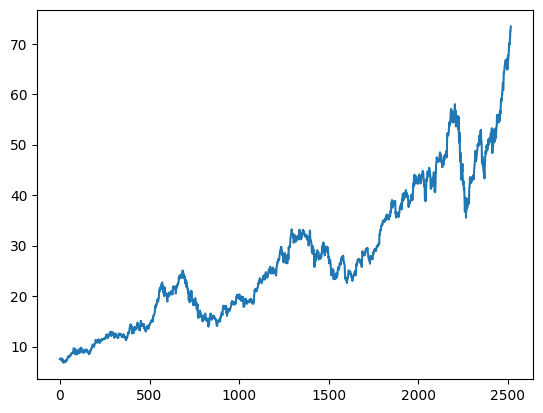

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

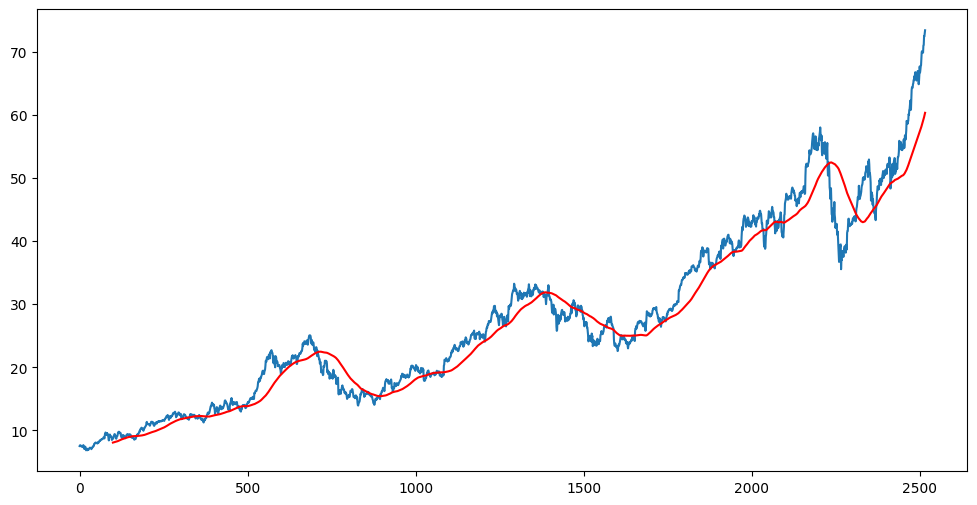

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r') #r is red colour

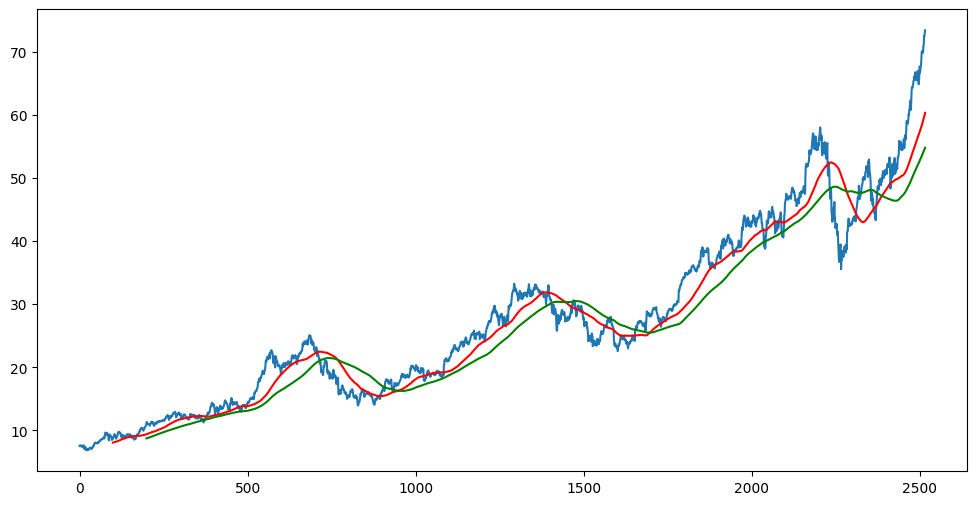

In [9]:
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))

plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g') 

In [10]:
df.shape

(2517, 5)

In [11]:
#Spiliting data into training and texting
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)  

(1761, 1)
(756, 1)


In [12]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [13]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [16]:
data_training_array.shape

(1761, 1)

In [17]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train),np.array(y_train)

In [21]:
x_train.shape

(1661, 100, 1)

In [19]:
#ML model

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs= 50)

Epoch 1/50
52/52 [==============================] - 21s 290ms/step - loss: 0.0753
Epoch 2/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0106
Epoch 4/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0093
Epoch 5/50
52/52 [==============================] - 14s 271ms/step - loss: 0.0085
Epoch 6/50
52/52 [==============================] - 15s 283ms/step - loss: 0.0087
Epoch 7/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0084
Epoch 8/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0075
Epoch 9/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0074
Epoch 11/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 13s 251ms/step - loss: 0.0065
Epoch 13/50
5

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Snehal\AppData\Local\Temp\ipykernel_15076\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [32]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [34]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [35]:
input_data.shape

(856, 1)

In [36]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
    

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [38]:
#Making predictions

y_predicted= model.predict(x_test)

24/24 [==============================] - 3s 81ms/step


In [39]:
y_predicted.shape

(756, 1)

In [40]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [41]:
y_predicted

array([[0.14791615],
       [0.14875399],
       [0.14957358],
       [0.15034786],
       [0.15105645],
       [0.15168515],
       [0.15223299],
       [0.15271631],
       [0.1531614 ],
       [0.1535941 ],
       [0.15403755],
       [0.1545027 ],
       [0.15499406],
       [0.15551718],
       [0.1560721 ],
       [0.15665363],
       [0.15725514],
       [0.157868  ],
       [0.15848893],
       [0.15912738],
       [0.15979122],
       [0.16048272],
       [0.16119614],
       [0.16195458],
       [0.16282538],
       [0.16386676],
       [0.16512674],
       [0.16664487],
       [0.16844802],
       [0.17054507],
       [0.17289785],
       [0.17547598],
       [0.17826618],
       [0.18125594],
       [0.1844231 ],
       [0.18773681],
       [0.19116569],
       [0.19468099],
       [0.19824655],
       [0.20182398],
       [0.20537886],
       [0.20888059],
       [0.21232207],
       [0.21569854],
       [0.21899813],
       [0.22219831],
       [0.2252732 ],
       [0.228

In [42]:
scaler.scale_

array([0.02099517])

In [44]:
scale_factor =1/0.02099517

y_predicted = y_predicted*scale_factor

y_test= y_test*scale_factor

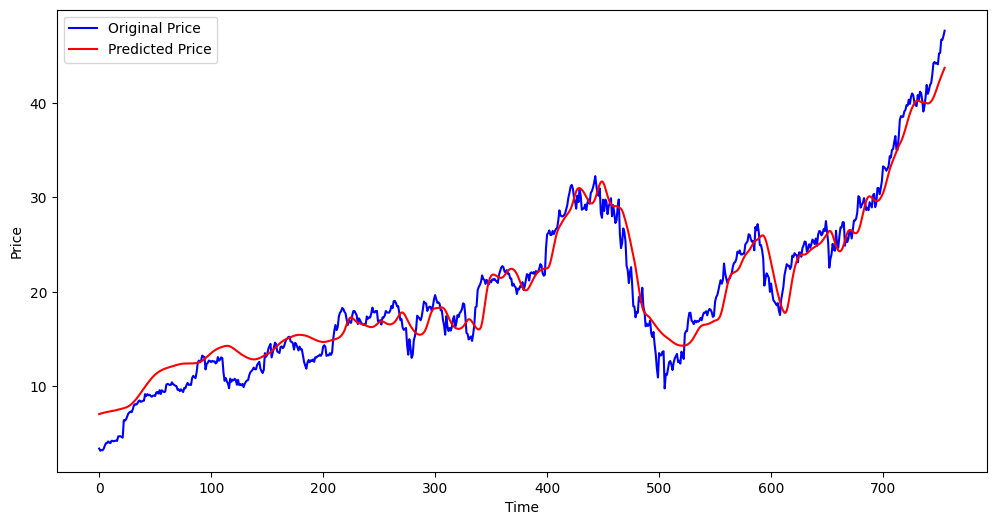

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show()